# Lab 3 Exercises for COMP 6321 Machine Learning

In this lab you'll translate mathematics from lecture into practical Numpy code. Specifically, you'll implement _logistic regression_ "from scratch" and compare the results of your own implementations to those of *scikit-learn*, a popular machine learning package. You'll also implement some variation of gradient descent. 

<span style="color:red"><i>Warning.</i></span> Many of the code cells in this notebook re-use the variable names like `X` or `y`, but assign them different data. If you run cells out of order, you may get unexpected results or errors, so be careful when switching between exercises.

**Run the code cell below** to import the required packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model

Lab3 requires a good understanding of Numpy and Matplotlib. Please complete Lab1 and Lab2 before attempting Lab3.

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

## 1. Logistic regression

Exercises 1.1&ndash;1.4 ask you to implement logistic regression, and to compare your results to applying the scikit-learn **[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** model.

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.1 &mdash; Vectorized code for generating predictions from a logistic model 

Recall from Lecture 3 that a basic logistic regression model has the form:
$$
\hat{y}(\mathbf{x}, \mathbf{w}) =  \sigma(\mathbf{x}^T \mathbf{w})
$$
where 
$$
\begin{align}
\mathbf{x} &= \begin{bmatrix} 1 & x_1 & \ldots & x_D \end{bmatrix}^T\\
\mathbf{w} &= \begin{bmatrix} w_0 & w_1 & \ldots & w_D \end{bmatrix}^T\\
\mathbf{\sigma(z)} &= \frac{1}{1 + e^{-z}}
\end{align}
$$

If both $\mathbf{x}$ and $\mathbf{w}$ are column vectors, the following Python function would evaluate the logistic regression model $\hat{y}(\mathbf{x}, \mathbf{w})$ correctly:
```python
def logistic_model_predict(x, w):
    """Returns a prediction from a logistic regression model at point x using parameters w."""
    return sigmoid(x.T @ w) 
```
However, we want a version of *logistic_model_predict* that vectorizes across many $\mathbf{x}$ simultaneously. 
This way we can compute all the outputs $\hat{y}(\mathbf{x}, \mathbf{w})$ in one shot (without the need for a loop processing all the inputs one-by-one).

Specifically, given a matrix of inputs:

$$
\mathbf{X} = \begin{bmatrix}
\mathbf{x}_1^T\\
\vdots \\
\mathbf{x}_N^T
\end{bmatrix}
$$

we want *logistic_model_predict* to compute a vector of outputs:

$$
\hat{\mathbf{y}} = \begin{bmatrix}
\sigma(\mathbf{x}_1^T \mathbf{w})\\
\vdots\\
\sigma(\mathbf{x}_N^T \mathbf{w})
\end{bmatrix}
$$

However, if we substitute $\mathbf{x}$ with $\mathbf{X}$ we can no longer use expression `X.T @ w`; the matrix $\mathbf{X}^T \in \mathbb{R}^{(D+1) \times N}$ isn't even the right shape to be on the left-hand side of the product. Writing vectorized code is full of annoying little problems like this (but it is super important for making the code faster).

**Write a function** that evaluates the logistic regression model in vectorized fashion. Specifically, when given a matrix $\mathbf{X} \in \mathbb{R}^{N \times (D+1)}$ as an argument, you should figure out what mathematical expression would result in the $\hat{\mathbf{y}}\in\mathbb{R}^N$ vector shown above. Hint: the solution is only a small change from `X.T @ w`. Write first a function that computes the sigmoid, and then a function "logistic_model_predict" that predicts the output of the logistic regression model.

In [2]:
def sigmoid(z):
    """Returns the element-wise logistic sigmoid of z."""
    # Your code here. Aim for 1 line.
    return 1 / (1 + np.exp(-z))
    
def logistic_model_predict(X, w):
    """
    Returns predictions from logistic model y(x, w) at each point X[i,:] using parameters w.
    Given X with shape (N,D+1), w must have shape (D+1,) and the result will have shape (N,).
    """
    # Your code here. Aim for 1-2 lines.
    return sigmoid(X @ w)

**Check your answer** by running the code cell below.

In [3]:
y = sigmoid(np.array([-1., 0., 1.5]))
assert isinstance(y, np.ndarray), "Expected an ndarray!"
assert np.allclose(y, [0.26894142, 0.5, 0.81757448]), "Values from sigmoid() appear to be wrong!"
w = np.array([2, 1.5])                           # Parameters corresponding to logistic model y = sigmoid(2 + 1.5*x1)
X = np.array([[1., -2.], [1.,  0.], [1.,  2.]])  # Evaluate at x1 = -2, 0, 2
y = logistic_model_predict(X, w)                 # Predict y for all X using w
assert isinstance(y, np.ndarray), "Expected an ndarray!"
assert np.allclose(y, [0.26894142, 0.88079708, 0.99330715]), "Wrong returned!\n%s" % y
try:
    y = logistic_model_predict(X, w.reshape(-1, 1))
except ValueError:
    raise AssertionError("Your answer works when 'w' is 1-dimensional, but not when it is a column vector. Try again.")
w = np.array([1, 0.5, 0.25])                      # Parameters corresponding to the 2D plane y = 1 + 0.5*x1 + 0.25*x2
X = np.array([[1., -3., 1.], [1.,  3., 0.], [1.,  5., -2.]])   # Evaluate at different (x1, x2) points
y = logistic_model_predict(X, w)                  # Predict y for all X using w
assert np.allclose(y, [0.4378235, 0.92414182, 0.95257413]), "Wrong predictions for 2-dimensional feature space!\n%s" % y
print("Correct!")

Correct!


**Plot several predictions at once** by running the code cell below.

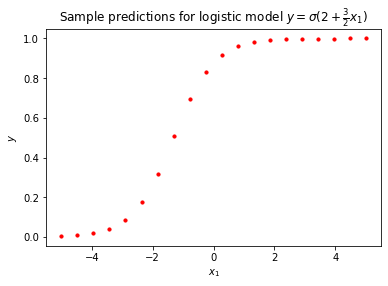

In [4]:
w = np.array([2, 1.5])                       # Parameters corresponding to logistic model y = sigmoid(2 + 1.5*x1)
x0 = np.ones(20)                             # A column of 1s so that the bias term w[0] gets added
x1 = np.linspace(-5, 5, 20)                  # A column of x values ranging from [-5, 5]
X_test = np.column_stack([x0, x1])           # A 20x2 matrix where X[i,:] is the ith x vector
y_test = logistic_model_predict(X_test, w)   # Evaluate all x values
plt.scatter(x1, y_test, 10, 'r')
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("Sample predictions for logistic model $y=\sigma(2 + \\frac{3}{2}x_1)$");

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.2 &mdash; Logistic regression by gradient descent

Recall from Lecture 3 that the basic logistic regression training objective (learning objective) is:

$$
\ell_\text{LR}(\mathbf{w}) = -\sum_{i=1}^N y_i \ln \sigma(\mathbf{w}^T \mathbf{x}_i) + (1-y_i) \ln \left(1-\sigma(\mathbf{w}^T \mathbf{x}_i)\right)
$$

The "basic" gradient for the above training objective is derived from a "Maximum likelihood estimate", and it is given by:

$$
\nabla \ell_\text{LR}(\mathbf{w}) = \sum_{i=1}^N (\sigma(\mathbf{w}^T \mathbf{x}_i) - y_i)\mathbf{x}_i
$$

**Write a function** to implement logistic regression by gradient descent. Your answer to _logistic_regression_grad_ should ideally be fully vectorized (no for-loops) that is reported in the slides of lecture 3.

In [5]:
def logistic_regression_grad(X, y, w):
    """Returns the gradient for basic logistic regression."""
    # Your code here. Aim for 1-2 lines.
    return (sigmoid(X @ w) - y) @ X

def logistic_regression(X, y, w_init, learn_rate=0.05, num_steps=500):
    """
    Fits a logistic model by gradient descent.
    
    If the feature matrix X has shape (N,D) the targets y should have shape (N,)
    and the initial parameters w_init should have shape (D,).
    
    Returns a new parameter vector w that minimizes the negative log likelihood of the targets.
    """
    # Your code here. Aim for 4-5 lines.
    w = w_init
    for i in range(num_steps):
        grad = logistic_regression_grad(X, y, w)
        w = w - learn_rate*grad
    return w


**Check your answer** by running the code cell below.

In [6]:
X = np.array([[1, -1.0], [1, 1.0], [1, 2.0]])
y = np.array([0.0, 0.0, 1.0])
grad = logistic_regression_grad(X, y, np.array([0.0, 1.0]))
assert isinstance(grad, np.ndarray), "Expected ndarray from logistic_regression_grad!"
assert grad.shape == (2,), "Expected gradient to have shape (2,) but was %s" % (grad.shape,)
assert np.allclose(grad, [0.88079708, 0.22371131]), "Wrong value for gradient!"
grad = logistic_regression_grad(X, y, np.array([-1.0, 1.5]))
assert np.allclose(grad, [0.57911459, 0.30819531]), "Wrong value for gradient!"
w = logistic_regression(X, y, np.array([1.0, 0.0]))
assert isinstance(w, np.ndarray), "Expected ndarray from logistic_regression!"
assert w.shape == (2,), "Expected parameter vector w to have shape (2,) but was %s" % (w.shape,)
assert np.allclose(w, [-4.14100532, 2.95489589]), "Parameters found by gradient descent seem wrong!"
print("Correct!")

Correct!


### Exercise 1.3 &mdash; Run logistic regression on data and plot the result

For this exercise you'll need to define Numpy arrays that correspond to the following training data:

$$
X = \begin{bmatrix}
1 & -4.1\\
1 & -2.8\\
1 & -0.7\\
1 &  3.5
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
0 \\
0\\
1\\
1
\end{bmatrix}
$$

**Write code** to create the following plot:
![image](img/fig-logistic-regression-1d-train-and-test.png)

Your code should follow this sequence of steps, which are the same as the previous lab:
1. Make ndarrays $\mathbf{X}$ and $\mathbf{y}$ that contain the above training set.
2. Plot the training set in blue. Use the $\mathbf{x}$ coordinates from the second column of $\mathbf{X}$, ignoring the first column.
3. Run logistic regression on $(\mathbf{X}, \mathbf{y})$ to get fitted parameters $\mathbf{w}$; use your *logistic_regression* function, starting from $\mathbf{w}_\text{init} = \begin{bmatrix} 0.0, 1.0 \end{bmatrix}^T$
4. Define a "test set" of 20 equally-spaced values of $x$ in range $[-5, 5]$. You will need to build a new matrix $\mathbf{X}_\text{test}$ with $1$ in the first column and the 20 distinct $x$ values in the second column.
5. Predict 20 $y$ values corresponding to the 20 rows of $\mathbf{X}_\text{test}$ by applying a logistic model with your fitted parameters $\mathbf{w}$. Do this with single call to your *logistic_model_predict* function. 
6. Plot the predictions on the test set.

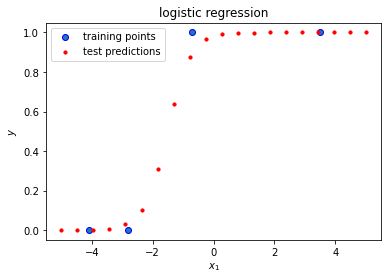

In [16]:
# 1. Define the training set. Aim for 2 lines.
X = np.array([[1,-4.1], [1,-2.8], [1,-0.7], [1,3.5]])
y = np.array([0,0,1,1])

# 2. Plot the training set. Aim for 1 line.
plt.scatter(X[:,1], y, edgecolors='b', label='training points')

# 3. Run logistic regression on the training set to get 'w'. Aim for 1-2 lines.
w_init = np.array([0.0, 1.0])
w = logistic_regression(X, y, w_init)

# 4. Define the test set matrix of shape (20,2). Aim for 1-3 lines.
X_test = np.column_stack([np.ones(20), np.linspace(-5, 5, 20)])

# 5. Use the linear model to make predictions on the test set. Aim for 1 line.
y_test = logistic_model_predict(X_test, w)

# 6. Plot the test predictions. Aim for 1 line, plus a few lines to configure the plot (axis labels etc).
plt.scatter(x1, y_test, 10, 'r', label='test predictions')
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("logistic regression")
plt.legend()

### Exercise 1.4 &mdash; Logistic regression training curve

Monitoring the performance on the training and validation sets during training is important to diagnose problems like overfitting and underfitting.
To do it, we assume to have the following validation dataset:

$$
X_{valid} = \begin{bmatrix}
1 & -3.9\\
1 & -2.6\\
1 & -0.7\\
1 &  3.4
\end{bmatrix}, \quad
\mathbf{y}_{valid} = \begin{bmatrix}
0 \\
0\\
1\\
1
\end{bmatrix}
$$

We can create the validation set by running the following lines:

In [17]:
# 1. Define the validation set. Use x_valid and y_valid as names for the arrays.
X_valid = np.array([[1, -3.9],
              [1, -2.6],
              [1, -0.7],
              [1,  3.4]])
y_valid = np.array([0, 0, 1, 1])

**Write a function** to compute the binary cross-entropy loss (BCE). The equation for the BCE is reported in the description of *Exercise 1.2*. The function must take in input the labels $\mathbf{y}$ and the predictions $\mathbf{\hat{y}}$. Hint: aim for a fully vectorized version without any "for loop". You can implement the summation with .sum() applied to a numpy array. Do not normalize the BCE by N (average BCE).

In [20]:
def binary_cross_entropy(y, y_hat):
    """Computes the binary-corss entropy given the predictions
    and the labels."""
    # Your code here. Aim for 1-2 lines.
    return -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

**Check your answer** by running the code cell below.

In [21]:
y = np.array([0.0, 0.0, 1.0, 1.0])
y_hat = np.array([0.5, 0.5, 0.5, 0.5])
bce = binary_cross_entropy(y, y_hat)
assert isinstance(grad, np.ndarray), "Expected ndarray from logistic_regression_grad!"
assert np.allclose(bce, [2.772588722239781]), "Wrong value for bce!"
eps = 1e-14
y = np.array([0.0, 0.0, 1.0, 1.0])
y_hat = np.array([0.0 + eps, 0.0 + eps, 1.0 - eps, 1.0 - eps])
bce = binary_cross_entropy(y, y_hat)
assert np.allclose(bce, [0.0]), "Wrong value for bce!"
y = np.array([0.0, 0.0, 1.0, 1.0])
y_hat = np.array([1.0 - eps, 1.0 - eps, 0.0 + eps, 0.0 + eps])
bce = binary_cross_entropy(y, y_hat)
assert np.allclose(bce, [128.94636440252697]), "Wrong value for bce!"
print("Correct!")

Correct!


You can now modify the *logistic_regression* function defined above. This time the function takes in input $\mathbf{X}_{valid}$ and $\mathbf{y}_{valid}$ as well. The function not only returns the final weights $\mathbf{w}$, but also two lists containing the training and validation losses measured after each parameter update. At the end of training, you can plot the training curve. The training curve should look like this: ![image](img/fig-logistic-regression-training_curve.png)


**Write code** to compute the training curves. Hint: copy and paste the *logistic_regression* function that you wrote before. Add a few lines to compute the BCE performance (on both training and validation) and append it into a list. You can get the predictions by using the function *logistic_model_predict* defined above. Initialize the weights with `w_init = np.array([0.0, 1.0])`.


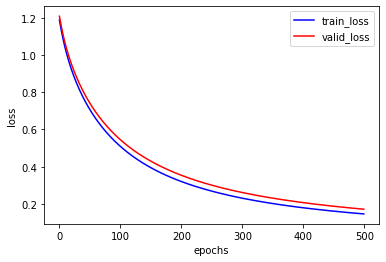

In [25]:
def logistic_regression(X, y, X_valid, y_valid, w_init, learn_rate=0.05, num_steps=500):
    """
    Fits a logistic model by gradient descent and computes the training and validation losses
    observed at each iteration. 
    
    Returns the final parameter vector w along with two lists containning the training and 
    validation losses computed for each update.
    """
    # Copy and paste the logistic_regression function + add 5-7 lines.
    w = w_init
    train_loss = []
    validation_loss = []
    for i in range(num_steps):
        grad = logistic_regression_grad(X, y, w)
        w = w - learn_rate*grad
        
        y_hat = logistic_model_predict(X, w)
        train_loss.append(binary_cross_entropy(y, y_hat))
    
        y_valid_hat = logistic_model_predict(X_valid, w)
        validation_loss.append(binary_cross_entropy(y, y_valid_hat))
    return w, train_loss, validation_loss

# Running logistic regession
w_init = np.array([0.0, 1.0])
w, train_losses, valid_losses = logistic_regression(X, y, X_valid, y_valid, w_init)


# Plot
plt.plot(train_losses, color='blue')
plt.plot(valid_losses, color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss','valid_loss'])
plt.show()


**Check your answer** by running the code cell below.

In [26]:
w_init = np.array([0.0, 1.0])
w, train_losses, valid_losses = logistic_regression(X, y, X_valid, y_valid, w_init)
assert isinstance(w, np.ndarray), "Expected ndarray from w!"
assert isinstance(train_losses, list), "Expected list from train_losses!"
assert isinstance(valid_losses, list), "Expected list from train_losses!"
assert np.allclose(train_losses[0], [1.1882397977596975]), "Wrong value for train_loss[0]!"
assert np.allclose(train_losses[-1], [0.14635972652618479]), "Wrong value for train_loss[-1]!"
assert np.allclose(valid_losses[0], [1.208186933116993]), "Wrong value for valid_loss[0]!"
assert np.allclose(valid_losses[-1], [0.17166290889596983]), "Wrong value for valid_loss[-1]!"
print("Correct!")

Correct!


### Exercise 1.5 &mdash; Logistic regression with Stocastic Gradient Descent (SGD)

In this case, we are using a tiny dataset. In real machine learning problems, however, datasets can be huge, and computing the gradient on huge datasets can be really expensive (see Lecture 2). For this reason, we often use a technique called *Stochastic Gradient Descent (SGD)*. Basically, instead of computing the gradient using the information of all the data points, we compute it on a subset of it. The samples used for updating the gradient are called batches, and the number of examples in the batch is called batch size. 

For instance, let's assume we have a training dataset with 4 samples:

$$
\mathbf{X} = \begin{bmatrix}
1 & x_1\\
1 & x_2\\
1 & x_3\\
1 &  x_4
\end{bmatrix}
$$

- If *batch_size=1*, we progressively compute the gradient and update the parameters using $\mathbf{X}[0:1]$, followed by $\mathbf{X}[1:2]$, followed by  $\mathbf{X}[2:3]$, followed by $\mathbf{X}[3:4]$, etc.

- If *batch_size=2*, we progressively compute the gradient and update the parameters using $\mathbf{X}[0:2]$, followed by $\mathbf{X}[2:4]$, followed by  $\mathbf{X}[0:2]$, followed by $\mathbf{X}[2:4]$, etc.

As you can see, after having used all the elements of the datasets, we restart from the first batch again.
In some cases, the number of samples is not divisible by the batch size (e.g., N=4, batch_size=3). There are different ways to manage this edge condition. Here we do the following:

- If *batch_size=3*, we progressively compute the gradient and update the parameters using $\mathbf{X}[0:3]$, followed by $\mathbf{X}[3:4]$, followed by  $\mathbf{X}[0:3]$, followed by $\mathbf{X}[3:4]$, etc.

- If *batch_size>=4*, we the algorithm must provide the same solution as standard gradient descent. 


**Write code** to perform SGD. Hint: copy and paste the *logistic_regression* function that you wrote before. Add a few lines to manage the indexes of $\mathbf{X}$ used to compute the gradient. Do not change the part that computes the training and validation losses. Make sure you update the batch indexes (that you can call beg_index  and end_index) properly. Make sure you reset the indexes when all the data in  $\mathbf{X}$ are processed.   


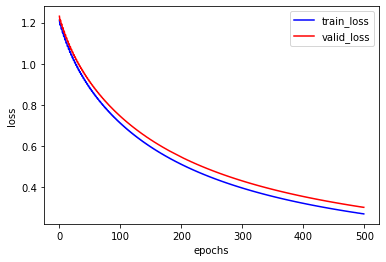

In [33]:
def logistic_regression_sgd(X, y, X_valid, y_valid, w_init, learn_rate=0.05, num_steps=500, batch_size=2):
    """
    Fits a logistic model by stochastic gradient descent and computes the training and validation losses
    observed at each iteration. 
    
    Returns the final parameter vector w along with two lists containning the training and 
    validation losses.
    """
    # Copy and paste the logistic_regression function + add 5-7 lines.
    
    tr_losses = []
    valid_losses = []
    beg_index = 0
    w = w_init
    for i in range(num_steps):
        if beg_index + batch_size >= len(X):
            X_selected = X[beg_index:len(X),:]
            Y_selected = Y[beg_index:len(X)]
            beg_index = 0
        else:
            X_selected = X[beg_index:beg_index+batch_size,:]
            Y_selected = Y[beg_index:beg_index+batch_size]
            beg_index+=batch_size
            
        grad = logistic_regression_grad(X_selected, Y_selected, w)
        w = w - learn_rate*grad
        
        y_hat = logistic_model_predict(X, w)
        tr_losses.append(binary_cross_entropy(y, y_hat))
    
        y_valid_hat = logistic_model_predict(X_valid, w)
        valid_losses.append(binary_cross_entropy(y, y_valid_hat))
    return w, tr_losses, valid_losses


# Running SGD
w_init = np.array([0.0, 1.0])
w, train_losses, valid_losses = logistic_regression_sgd(X, y, X_valid, y_valid, w_init)

# Plotting the training curve. 
plt.plot(train_losses, color='blue')
plt.plot(valid_losses, color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss','valid_loss'])
plt.show()

In [34]:
w_init = np.array([0.0, 1.0])
w, train_losses, valid_losses = logistic_regression(X, y, X_valid, y_valid, w_init)
w_sgd, train_losses_sgd, valid_losses_sgd = logistic_regression_sgd(X, y, X_valid, y_valid, w_init, batch_size=4)
assert isinstance(w_sgd, np.ndarray), "Expected ndarray from w!"
assert np.allclose(train_losses[-1],train_losses_sgd[-1]), "Wrong value for train_loss_sgd[0] with batch_size=4!"
w_sgd, train_losses_sgd, valid_losses_sgd = logistic_regression_sgd(X, y, X_valid, y_valid, w_init, batch_size=10)
assert np.allclose(train_losses[-1],train_losses_sgd[-1]), "Wrong value for train_loss_sgd[0] with batch_size=10!"
w_sgd, train_losses_sgd, valid_losses_sgd = logistic_regression_sgd(X, y, X_valid, y_valid, w_init, batch_size=1)
assert np.allclose(train_losses_sgd[-1], [0.44526878544468906]), "Wrong value for train_loss[-1]!"
assert np.allclose(valid_losses_sgd[-1], [0.48118611316310933]), "Wrong value for valid_loss[-1]!"
w_sgd, train_losses_sgd, valid_losses_sgd = logistic_regression_sgd(X, y, X_valid, y_valid, w_init, batch_size=2)
assert np.allclose(train_losses_sgd[-1], [0.2679192288570068]), "Wrong value for train_loss[-1]!"
assert np.allclose(valid_losses_sgd[-1], [0.3000937826813224]), "Wrong value for valid_loss[-1]!"
w_sgd, train_losses_sgd, valid_losses_sgd = logistic_regression_sgd(X, y, X_valid, y_valid, w_init, batch_size=3)
assert np.allclose(train_losses_sgd[-1], [0.2695033737939515]), "Wrong value for train_loss[-1]!"
assert np.allclose(valid_losses_sgd[-1], [0.30156676721964487]), "Wrong value for valid_loss[-1]!"
print("Correct!")

Correct!


### Exercise 1.6 &mdash; Logistic regression with Learning Rate Decay

It is often convenient to reduce the learning rate while training a model. Several methods have been proposed in the literature. Here, we just consider a linear learning rate decay the reduces linearly the learning over the optimization steps from its initial value to a final one.
For instance, if the initial learning rate is set to 0.5, the final one is set to 0.005 and we have 500 steps:
   - update 1 will use a learning of 0.05
   - update 2 will use a learning of 0.49900801603206413
   - update 10 will use a learning of 0.4900801603206413
   - update 500 will use a learning of 0.05

**Write code** to perform SGD with learning rate annealing. Hint: copy and paste the **logistic_regression_sgd** function that you wrote before. Add a couple of lines to implement the linear decay.  

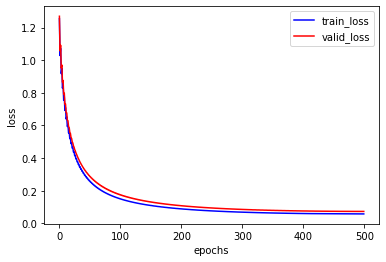

In [37]:
def logistic_regression_sgd_lr_decay(X, y, X_valid, y_valid, w_init, learn_rate_init=0.5, learn_rate_final=0.005, num_steps=500, batch_size=2):
    """
    Fits a logistic model by gradient descent and learning rate annealing.
    
    Returns the final parameter vector w along with two lists containning the training and 
    validation losses.
    """
    # Copy and paste the logistic_regression function + add 5-7 lines.
    tr_losses = []
    valid_losses = []
    beg_index = 0
    w = w_init
    learn_rate_step = (learn_rate_init-learn_rate_final)/num_steps
    learn_rate = learn_rate_init
    for i in range(num_steps):
        if beg_index + batch_size >= len(X):
            X_selected = X[beg_index:len(X),:]
            Y_selected = Y[beg_index:len(X)]
            beg_index = 0
        else:
            X_selected = X[beg_index:beg_index+batch_size,:]
            Y_selected = Y[beg_index:beg_index+batch_size]
            beg_index+=batch_size
            
        grad = logistic_regression_grad(X_selected, Y_selected, w)
        w = w - learn_rate*grad
        
        y_hat = logistic_model_predict(X, w)
        tr_losses.append(binary_cross_entropy(y, y_hat))
    
        y_valid_hat = logistic_model_predict(X_valid, w)
        valid_losses.append(binary_cross_entropy(y, y_valid_hat))
        
        learn_rate -= learn_rate_step
    return w, tr_losses, valid_losses


# Running SGD with lr_decay
w_init = np.array([0.0, 1.0])
w, train_losses, valid_losses = logistic_regression_sgd_lr_decay(X, y, X_valid, y_valid, w_init)

# Plot the training curve 
plt.plot(train_losses, color='blue')
plt.plot(valid_losses, color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss','valid_loss'])
plt.show()

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.7 &mdash; Run scikit-learn LogisticRegression

The scikit-learn package provides a **[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** object to perform logistic regression.

**Write code to fit a LogisticRegression model** using the same training matrix $\mathbf{X}$ that you defined as part of Exercise 3.3. There are only two steps:
1. Create the _LogisticRegression_ object. Do not fit an "intercept" and do not include any regularization penalty (see [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).
2. Fit the _LogisticRegression_ object to the training matrix $\mathbf{X}$ and targets $\mathbf{y}$. Use the object's **[fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit)** method.

The variable holding a reference to your _LogisticRegression_ object should be called `logistic_model`, so that your answer can be checked.

A tweet regarding the fact that scikit-learn's LogisticRegression object applies regularization (a weight penalty) "by default":
![image](img/fig-logistic-regression-regularization-tweet.png)

In [38]:
# Your code here. Aim for 2 lines.
logistic_model = sklearn.linear_model.LogisticRegression(fit_intercept=False, penalty='none')
logistic_model.fit(X, y);

**Check your answer** by running the code cell below.

In [39]:
assert 'logistic_model' in globals(), "You didn't create a variable named 'logistic_model'!"
assert isinstance(logistic_model, sklearn.linear_model.LogisticRegression), "Expected a LogisticRegression instance!"
assert hasattr(logistic_model, 'coef_'), "No model coefficients yet! You didn't fit the model to any data!"
assert logistic_model.intercept_ == 0.0, "You forgot to disable fitting of the intercept!"
assert np.allclose(logistic_model.coef_, [[18.5251137, 10.49283446]]), "The parameters seem incorrect! Not L-BFGS? Used penalty?"
print("Correct!")

Correct!


Notice that the model parameters (coefficients) found by the _LogisticRegression_ are much larger than those found by your gradient descent solver. That is only because scikit-learn uses a more powerful optimization algorithm and can learn very sharp decision boundaries in fewer steps than mere gradient descent can. If you increase your *num_steps* argument your solver will find similarly large coefficients.

**Plot several LogisticRegression predictions at once** by running the code cell below.

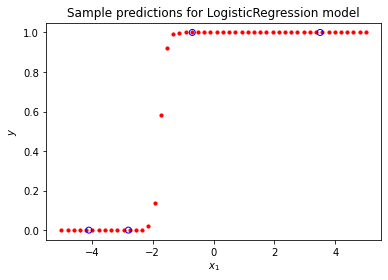

In [40]:
x0 = np.ones(50)                               # A column of 1s so that the bias term w[0] gets added
x1 = np.linspace(-5, 5, 50)                    # A column of x values ranging from [-5, 5]
X_test = np.column_stack([x0, x1])             # A 20x2 matrix where X[i,:] is the ith x vector
y_test = logistic_model.predict_proba(X_test)  # Evaluate all x values and get two probabilities back (class 0, class 1)
plt.scatter(x1, y_test[:,1], 10, 'r')          # Plot probability of class 1 only
plt.scatter(X[:,1], y, edgecolor='b', facecolor='none')
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("Sample predictions for LogisticRegression model");